# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | sao vicente
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | angra do heroismo
Processing Record 7 of Set 1 | bayan nur
City not found. Skipping...
Processing Record 8 of Set 1 | papao
Processing Record 9 of Set 1 | i-n-salah
Processing Record 10 of Set 1 | severnoye
Processing Record 11 of Set 1 | colac
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | gargalianoi
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | akureyri
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | stephenville
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | saint-leu
Processing Record 21 of Set 1 | edinburgh 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,19.27,86,100,3.44,US,1699660265
1,sao vicente,-23.9631,-46.3919,78.28,26,86,4.09,BR,1699659997
2,afaahiti,-17.7500,-149.2833,84.07,83,97,10.83,PF,1699660268
3,whitehorse,60.7161,-135.0538,32.77,86,100,5.75,CA,1699660130
4,hithadhoo,-0.6000,73.0833,80.37,84,89,13.82,MV,1699660270


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,19.27,86,100,3.44,US,1699660265
1,sao vicente,-23.9631,-46.3919,78.28,26,86,4.09,BR,1699659997
2,afaahiti,-17.7500,-149.2833,84.07,83,97,10.83,PF,1699660268
3,whitehorse,60.7161,-135.0538,32.77,86,100,5.75,CA,1699660130
4,hithadhoo,-0.6000,73.0833,80.37,84,89,13.82,MV,1699660270


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

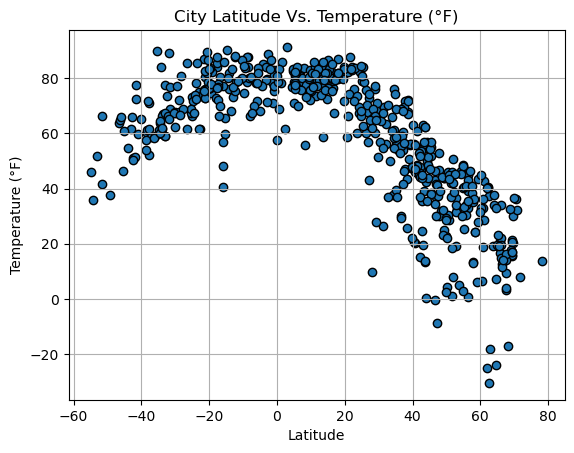

In [16]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat'].astype(float)
temp = city_data_df['Max Temp'].astype(float)
humidity = city_data_df['Humidity'].astype(float)
cloudiness = city_data_df['Cloudiness'].astype(float)
windspd = city_data_df['Wind Speed'].astype(float)
plt.scatter(x_values,temp,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title("City Latitude Vs. Temperature (°F)")
plt.grid()
# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

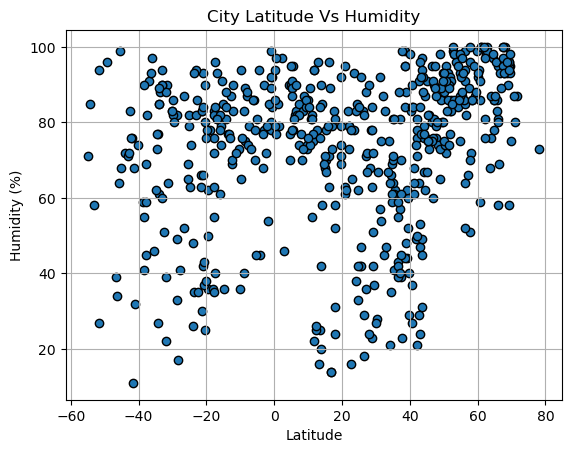

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x_values,humidity,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

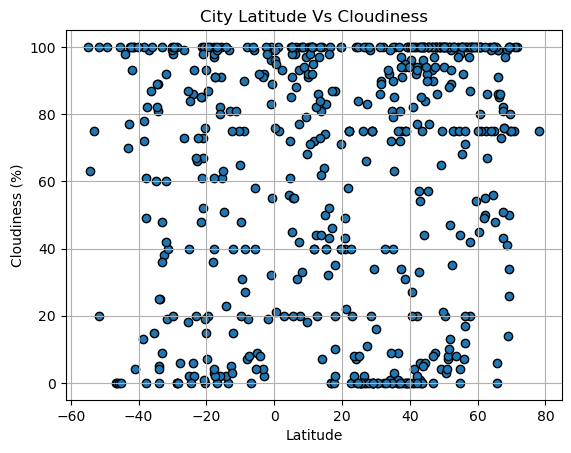

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(x_values,cloudiness,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

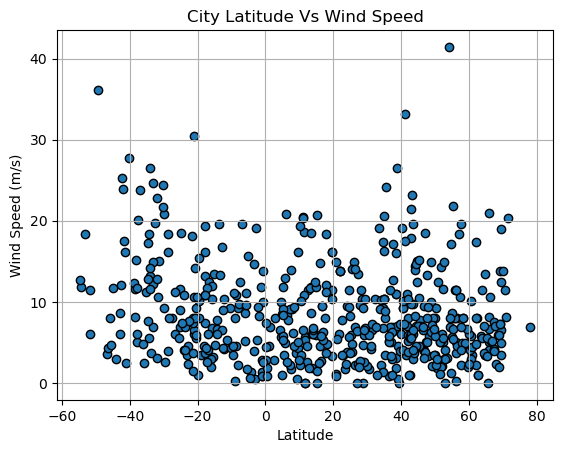

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(x_values,windspd,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,19.27,86,100,3.44,US,1699660265
3,whitehorse,60.7161,-135.0538,32.77,86,100,5.75,CA,1699660130
5,angra do heroismo,38.6500,-27.2167,72.21,99,75,15.99,PT,1699660271
7,i-n-salah,27.1935,2.4607,72.86,36,66,13.42,DZ,1699660070
8,severnoye,56.3491,78.3619,32.99,99,100,5.01,RU,1699660281


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sao vicente,-23.9631,-46.3919,78.28,26,86,4.09,BR,1699659997
2,afaahiti,-17.7500,-149.2833,84.07,83,97,10.83,PF,1699660268
4,hithadhoo,-0.6000,73.0833,80.37,84,89,13.82,MV,1699660270
6,papao,-17.7500,-149.5500,85.68,76,98,7.45,PF,1699660051
9,colac,-38.3333,143.5833,60.17,41,78,11.52,AU,1699660283


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.838618124309452


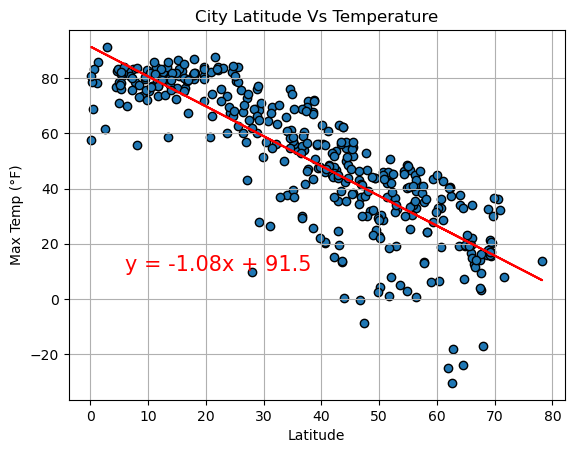

In [65]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# North
x_axis = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, north_temp)
tempregress = x_axis * slope + intercept
line_eq_temp = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axis,north_temp,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
plt.title('City Latitude Vs Temperature')
plt.grid()
plt.plot(x_axis,tempregress,'r-')
plt.annotate(line_eq_temp,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.6455671279676559


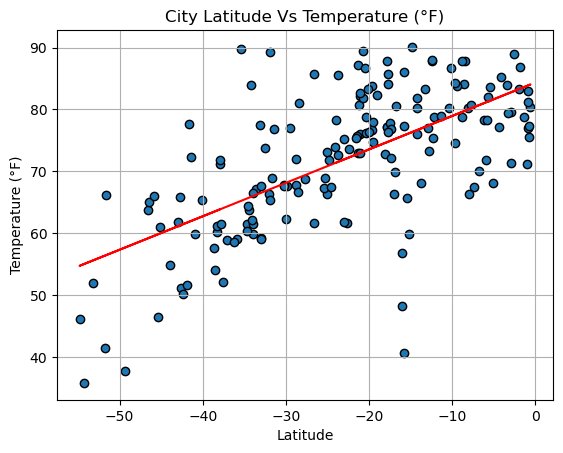

In [66]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# South
x_axes = southern_heim_df['Lat']
south_temp = southern_heim_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axes, south_temp)
temp_regress = x_axes * slope + intercept
line_eq_temps = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axes,south_temp,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('City Latitude Vs Temperature (°F)')
plt.grid()
plt.plot(x_axes,temp_regress,'r-')
plt.annotate(line_eq_temps,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** Based off the regression and scatter plots we created, we can see a negative correlation between latitude and temperature in the northern hemisphere, and a positive correlation between latitude and temperature in the southern hemisphere. Our R-vale in the northern hemisphere is higher for these particular set of cities, indicating that there is a strong correlation. Our R-value in the southern hemisphere is also high, but falls between the .5 - .7 range, indicating a moderate correlation between temperature and latitude for these particular set of cities.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.27572379229334665


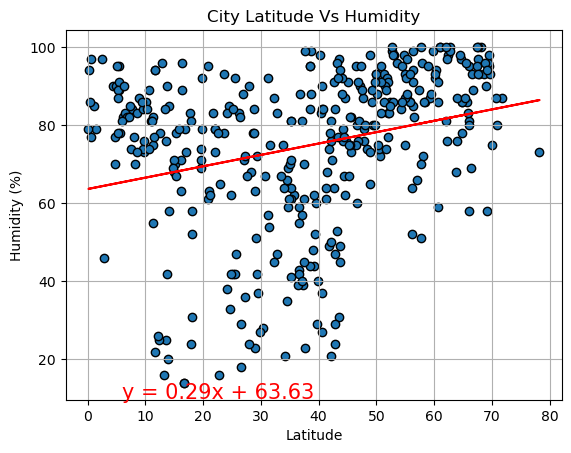

In [67]:
# Northern Hemisphere
# YOUR CODE HERE
north_humid = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, north_humid)
humidregress = x_axis * slope + intercept
line_eq_humid = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axis,north_humid,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity')
plt.grid()
plt.plot(x_axis,humidregress,'r-')
plt.annotate(line_eq_humid,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')


The r-value is: 0.17403333879585534


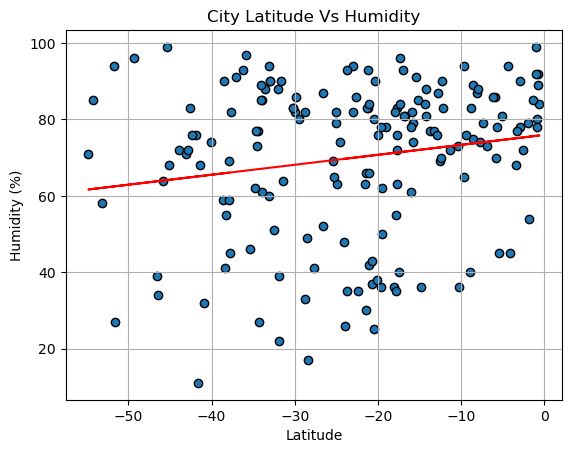

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
south_humid = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axes, south_humid)
humid_regress = x_axes * slope + intercept
line_eq_humids = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axes,south_humid,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity')
plt.grid()
plt.plot(x_axes,humid_regress,'r-')
plt.annotate(line_eq_humids,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** Based off our linear regression and scatter plots, we can see that the correlation between latitude and humidity is very weak in both north and southern hemisphere, with an R-Value of < 0.3. Both heimspheres show a weak sign of a positive correlation as latitude increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10368772619349037


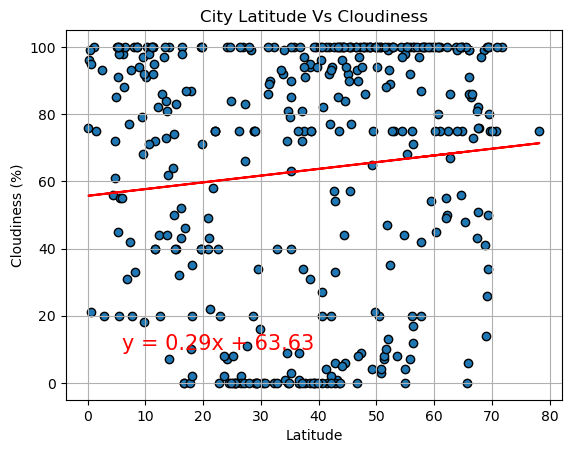

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
north_cloud = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, north_cloud)
cloudregress = x_axis * slope + intercept
line_eq_cloud = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axis,north_cloud,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness')
plt.grid()
plt.plot(x_axis,cloudregress,'r-')
plt.annotate(line_eq_humid,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.039377633977670044


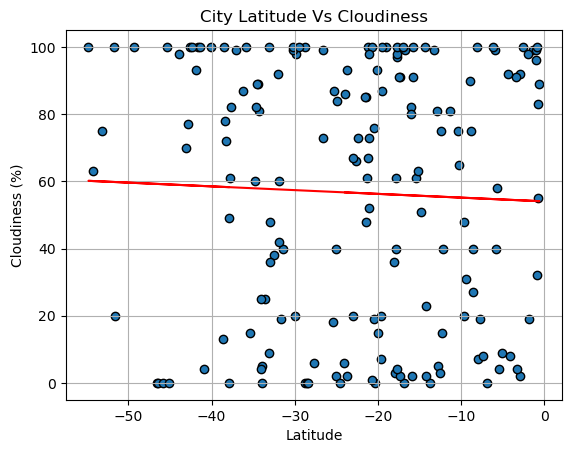

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
south_cloud = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axes, south_cloud)
cloud_regress = x_axes * slope + intercept
line_eq_clouds = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axes,south_cloud,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness')
plt.grid()
plt.plot(x_axes,cloud_regress,'r-')
plt.annotate(line_eq_clouds,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** Based off our linear regression and scatter plots, we can see that the northern hemisphere has a very weak positive correlation, while the southern hemisphere has a very weak negative correlation between latitude and cloudiness.We can conclude that there is a very weak correlation between latitude and cloudiness with an R-vale of approximately < 0.1.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0026671354349297512


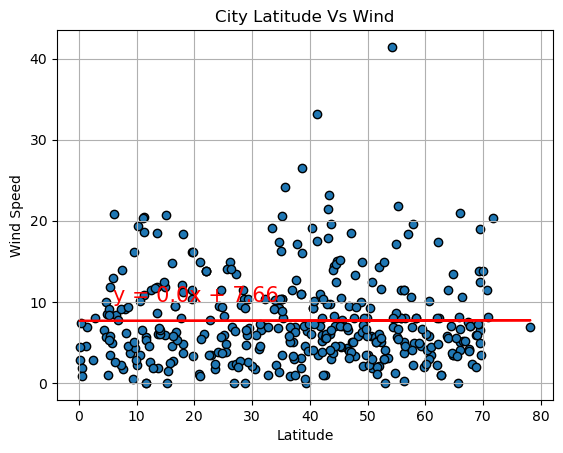

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
north_wind = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, north_wind)
windregress = x_axis * slope + intercept
line_eq_wind = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axis,north_wind,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude Vs Wind')
plt.grid()
plt.plot(x_axis,windregress,'r-')
plt.annotate(line_eq_wind,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.3158145537242289


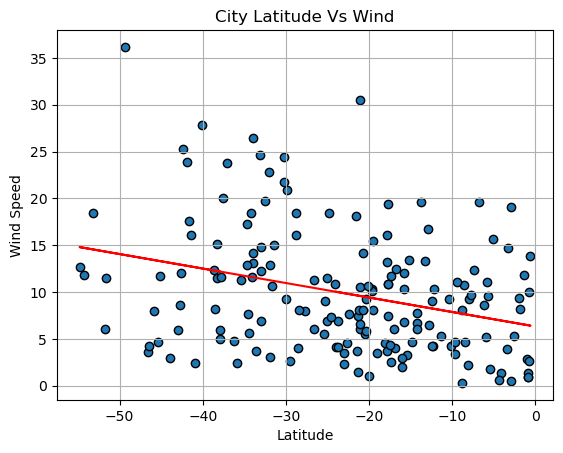

In [53]:
# Southern Hemisphere
# YOUR CODE HERE
south_wind = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axes, south_wind)
wind_regress = x_axes * slope + intercept
line_eq_winds = f'y = {str(round(slope,2))}x + {str(round(intercept,2))} '

plt.scatter(x_axes,south_wind,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude Vs Wind')
plt.grid()
plt.plot(x_axes,wind_regress,'r-')
plt.annotate(line_eq_winds,(6,10),fontsize=15,color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** Based off our linear regression and scatter plots, we can see no correlation between latitude and wind speed for the northern hemisphere. But for the southern hemisphere there is a weak negative correlation between latitude and wind speed, with an R-value of -0.3. This is very strange since so far we've seen either opposing correlation or same correlation with similar or equal r-values. We may have to do this regression again with a different random set of cities to confirm this, as it seems odd. 